In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


# 3. Работа с Pandas

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [ ]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [ ]:
df.head(9)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12
5,2008-01-06,-14
6,2008-01-07,-6
7,2008-01-08,-7
8,2008-01-09,-6


С помощью `Pandas` решите следующие задачи

**3.1.** Определите самый холодный год, в котором средняя температура была минимальная и самый теплый год. 

In [ ]:
df['year']=pd.DatetimeIndex(df['Day']).year
s = df.groupby('year').agg({'t':'mean'})
cold = s['t'].min()
hot = s['t'].max()
print('Самый холодный год:', s.index[s['t'] == cold].tolist()[0])
print('Самый теплый год:', s.index[s['t'] == hot].tolist()[0])


Самый холодный год: 2012
Самый теплый год: 2015


**3.2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [ ]:
df['month']=pd.DatetimeIndex(df['Day']).month
s = df[(df['month']==1)&(df['t']>=0)].groupby('year').agg({'t':'count'})
print('Данный год:', s.index[s['t'] == s['t'].max()].tolist()[0])

Данный год: 2008


**3.3.** В каком году было самое холодное лето (по средней температуре)

In [ ]:
s = df[((df['month']==6)|(df['month']==7)|(df['month']==8))&(df['t']>=0)].groupby('year').agg({'t':'mean'})
print('Данный год:', s.index[s['t'] == s['t'].min()].tolist()[0])

Данный год: 2008


**3.4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [ ]:
df['day']=pd.DatetimeIndex(df['Day']).day
df['diff t'] = abs(df['t'] - df['t'].shift(1))
diff = df['diff t'].max()
print(df.iloc[[df.index[df['diff t']==diff].tolist()[0] - 1]].Day.tolist()[0])

2014-05-26 00:00:00


**3.5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

In [12]:
s = df.groupby('year').agg({'t':'mean'})
print(s)
x = s.index.tolist()
y = s['t'].tolist()
print(x,' ', y)

             t
year          
2008  8.545205
2009  7.610959
2010  7.117808
2011  8.337912
2012  6.980822
2013  8.728767
2014  8.931507
2015  9.079452
2016  7.907104
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]   [8.545205479452054, 7.610958904109589, 7.117808219178082, 8.337912087912088, 6.980821917808219, 8.728767123287671, 8.931506849315069, 9.07945205479452, 7.907103825136612]


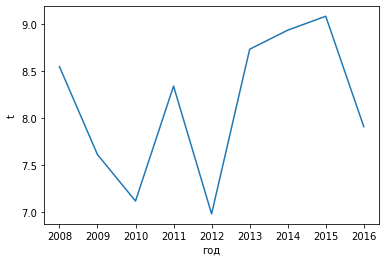

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel('год')
plt.ylabel('t')

plt.show()